<a href="https://colab.research.google.com/github/RamosGoat/RamosGoat/blob/main/Netflix_case_study_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("/content/netflix_titles.csv")

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Extracting list of Description

In [ ]:
df_description = pd.DataFrame(df['description'].apply(lambda x: str(x).split(', ')).tolist(), index = df['title'])
df_description = df_description.stack().reset_index()
df_description.drop('level_1', axis = 1, inplace = True)
df_description.rename(columns ={0:'description'}, inplace = True)
df_description.head(10)

,title,description
0,Dick Johnson Is Dead,As her father nears the end of his life
1,Dick Johnson Is Dead,filmmaker Kirsten Johnson stages his death in ...
2,Blood & Water,After crossing paths at a party
3,Blood & Water,a Cape Town teen sets out to prove whether a p...
4,Ganglands,To protect his family from a powerful drug lord
5,Ganglands,skilled thief Mehdi and his expert team of rob...
6,Jailbirds New Orleans,Feuds
7,Jailbirds New Orleans,flirtations and toilet talk go down among the ...
8,Kota Factory,In a city of coaching centers known to train I...
9,Kota Factory,an earnest but unexceptional student and his f...


Extracting list of Genres

In [ ]:
df_genre = pd.DataFrame(df['listed_in'].apply(lambda x: str(x).split(', ')).tolist(), index = df['title'])
df_genre = df_genre.stack().reset_index()
df_genre
df_genre.drop('level_1', axis = 1, inplace = True)
df_genre
df_genre.rename(columns ={0:'genre'}, inplace = True)
df_genre.head(10)

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
5,Ganglands,International TV Shows
6,Ganglands,TV Action & Adventure
7,Jailbirds New Orleans,Docuseries
8,Jailbirds New Orleans,Reality TV
9,Kota Factory,International TV Shows


Extracting list of Directors

In [ ]:
df_director_r = pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(), index = df['title'])
df_director = df_director_r.stack().reset_index()
df_director.drop('level_1', axis = 1, inplace = True)
df_director.rename(columns ={0:'Director'}, inplace = True)
df_director.head(10)

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


Extracting Cast

In [ ]:
df_cast = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).tolist(), index = df['title'])
df_cast = df_cast.stack().reset_index()
df_cast.drop('level_1', axis = 1, inplace = True)
df_cast.rename(columns ={0:'cast'}, inplace = True)
df_cast.head(10)

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
5,Blood & Water,Dillon Windvogel
6,Blood & Water,Natasha Thahane
7,Blood & Water,Arno Greeff
8,Blood & Water,Xolile Tshabalala
9,Blood & Water,Getmore Sithole


Extracting list of cast

In [ ]:
df_cast = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).tolist(), index = df['title'])
df_cast = df_cast.stack().reset_index()
df_cast.drop('level_1', axis = 1, inplace = True)
df_cast.rename(columns ={0:'cast'}, inplace = True)
df_cast.head(10)

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
5,Blood & Water,Dillon Windvogel
6,Blood & Water,Natasha Thahane
7,Blood & Water,Arno Greeff
8,Blood & Water,Xolile Tshabalala
9,Blood & Water,Getmore Sithole


Country extracting from list of countries

In [ ]:
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(), index = df['title'])
df_country = df_country.stack().reset_index()
df_country.drop('level_1', axis = 1, inplace = True)
df_country.rename(columns ={0:'country'}, inplace = True)
df_country.head(10)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
5,Midnight Mass,nan
6,My Little Pony: A New Generation,nan
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


In [ ]:
df_new = df_director.merge( df_cast, how ='inner', on ='title')
df_new.head(25)

,title,Director,cast
0,Dick Johnson Is Dead,Kirsten Johnson,nan
1,Blood & Water,nan,Ama Qamata
2,Blood & Water,nan,Khosi Ngema
3,Blood & Water,nan,Gail Mabalane
4,Blood & Water,nan,Thabang Molaba
5,Blood & Water,nan,Dillon Windvogel
6,Blood & Water,nan,Natasha Thahane
7,Blood & Water,nan,Arno Greeff
8,Blood & Water,nan,Xolile Tshabalala
9,Blood & Water,nan,Getmore Sithole


In [ ]:
df_added = df_new.merge(df_genre,how ='left', on ='title')
df_added

,title,Director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries
1,Blood & Water,nan,Ama Qamata,International TV Shows
2,Blood & Water,nan,Ama Qamata,TV Dramas
3,Blood & Water,nan,Ama Qamata,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,International TV Shows
...,...,...,...,...
161211,Zubaan,Mozez Singh,Anita Shabdish,International Movies
161212,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
161213,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
161214,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [ ]:
df_added1 = df_added.merge(df_description,how ='left', on ='title')
df_added1

,title,Director,cast,genre,description
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,As her father nears the end of his life
1,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,filmmaker Kirsten Johnson stages his death in ...
2,Blood & Water,nan,Ama Qamata,International TV Shows,After crossing paths at a party
3,Blood & Water,nan,Ama Qamata,International TV Shows,a Cape Town teen sets out to prove whether a p...
4,Blood & Water,nan,Ama Qamata,TV Dramas,After crossing paths at a party
...,...,...,...,...,...
320972,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,while facing his fear of music and the truth a...
320973,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,A scrappy but poor boy worms his way into a ty...
320974,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,while facing his fear of music and the truth a...
320975,Zubaan,Mozez Singh,Chittaranjan Tripathy,Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df_final =df_added1.merge(df[['show_id', 'type','title', 'date_added',
                          'release_year', 'rating', 'duration']], on =['title'], how ='left' )
df_final

,title,Director,cast,genre,description,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,As her father nears the end of his life,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,filmmaker Kirsten Johnson stages his death in ...,s1,Movie,"September 25, 2021",2020,PG-13,90 min
2,Blood & Water,nan,Ama Qamata,International TV Shows,After crossing paths at a party,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,International TV Shows,a Cape Town teen sets out to prove whether a p...,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Ama Qamata,TV Dramas,After crossing paths at a party,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
320972,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,while facing his fear of music and the truth a...,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
320973,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,A scrappy but poor boy worms his way into a ty...,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
320974,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,while facing his fear of music and the truth a...,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
320975,Zubaan,Mozez Singh,Chittaranjan Tripathy,Music & Musicals,A scrappy but poor boy worms his way into a ty...,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [ ]:
df_Finally_Done = df_final.merge(df_country,how ='left', on ='title')
df_Finally_Done#This is final cleaned Dataset All the Anlsysis will done on this dataset

,title,Director,cast,genre,description,show_id,type,date_added,release_year,rating,duration,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,As her father nears the end of his life,s1,Movie,"September 25, 2021",2020,PG-13,90 min,United States
1,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,filmmaker Kirsten Johnson stages his death in ...,s1,Movie,"September 25, 2021",2020,PG-13,90 min,United States
2,Blood & Water,nan,Ama Qamata,International TV Shows,After crossing paths at a party,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,South Africa
3,Blood & Water,nan,Ama Qamata,International TV Shows,a Cape Town teen sets out to prove whether a p...,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,South Africa
4,Blood & Water,nan,Ama Qamata,TV Dramas,After crossing paths at a party,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,South Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
399854,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,while facing his fear of music and the truth a...,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,India
399855,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,A scrappy but poor boy worms his way into a ty...,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,India
399856,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,while facing his fear of music and the truth a...,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,India
399857,Zubaan,Mozez Singh,Chittaranjan Tripathy,Music & Musicals,A scrappy but poor boy worms his way into a ty...,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,India


In [ ]:
df_Finally_Done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399859 entries, 0 to 399858
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         399859 non-null  object
 1   Director      399859 non-null  object
 2   cast          399859 non-null  object
 3   genre         399859 non-null  object
 4   description   399859 non-null  object
 5   show_id       399859 non-null  object
 6   type          399859 non-null  object
 7   date_added    399466 non-null  object
 8   release_year  399859 non-null  int64 
 9   rating        399725 non-null  object
 10  duration      399847 non-null  object
 11  country       399859 non-null  object
dtypes: int64(1), object(11)
memory usage: 36.6+ MB


In [ ]:
df_Finally_Done['cast'].replace(['nan'], ['Unknown Actor'], inplace = True)
df_Finally_Done['Director'].replace(['nan'], ['Unknown Director'], inplace = True)
df_Finally_Done['country'].replace(['nan'], ['Country not found'], inplace = True)
df_Finally_Done.sample(10)

,title,Director,cast,genre,description,show_id,type,date_added,release_year,rating,duration,country
130734,Justine,Stephanie Turner,Daisy Prescott,Dramas,and the two discover they have more in common ...,s2821,Movie,"March 13, 2020",2019,TV-MA,106 min,United States
190095,The Tree of Blood,Julio Medem,Úrsula Corberó,Dramas,both reveal their relatives' dark secrets and ...,s4125,Movie,"February 8, 2019",2018,TV-MA,136 min,Spain
250402,Buddy Thunderstruck,Unknown Director,J.D. Ryznar,TV Comedies,a truck-racing dog who brings guts and good ti...,s5579,TV Show,"March 10, 2017",2017,TV-Y7,1 Season,United States
57899,Coven of Sisters,Pablo Agüero,Jone Laspiur,Dramas,1609. To postpone their execution,s1221,Movie,"March 11, 2021",2021,TV-MA,92 min,Spain
397670,Y.M.I.: Yeh Mera India,N. Chandra,Atul Kulkarni,International Movies,The lives of a middle-aged soap opera addict,s8770,Movie,"March 1, 2018",2008,TV-MA,137 min,India
90539,Zulu Man in Japan,Unknown Director,Nasty C,International Movies,In this documentary,s1957,Movie,"September 25, 2020",2019,TV-MA,44 min,Country not found
258495,My Little Pony Equestria Girls: Legend of Ever...,Ishi Rudell,Cathy Weseluck,Children & Family Movies,human teen counterparts to My Little Pony char...,s5774,Movie,"October 1, 2016",2016,TV-Y7,73 min,United States
321641,Just Friends,Roger Kumble,Chris Marquette,Comedies,a once-portly nice guy comes home for the holi...,s7153,Movie,"September 1, 2019",2005,PG-13,94 min,United States
131782,Velvet,Carlos Sedes,Paula Echevarría,International TV Shows,despite the objections of his family.,s2847,TV Show,"March 4, 2020",2016,TV-14,4 Seasons,Spain
297572,Dragonheart: A New Beginning,Doug Lefler,Matt Hickey,Action & Adventure,Drake,s6644,Movie,"January 1, 2020",2000,PG,84 min,United States


In [ ]:
df_Finally_Done.isnull().sum()

title             0
Director          0
cast              0
genre             0
description       0
show_id           0
type              0
date_added      393
release_year      0
rating          134
duration         12
country           0
dtype: int64

Rating to be replaced with Duration

In [ ]:
df_Finally_Done[df_Finally_Done['duration'].isnull()]
df_Finally_Done['duration'].fillna(df_Finally_Done['rating'], inplace=True)


Rating null values replaced with zero

In [ ]:
df_Finally_Done[df_Finally_Done['rating'].isnull()]
df_Finally_Done['rating'].fillna(0, inplace=True)



In [ ]:
df_Finally_Done.isnull().sum()

title             0
Director          0
cast              0
genre             0
description       0
show_id           0
type              0
date_added      393
release_year      0
rating            0
duration          0
country           0
dtype: int64

In [ ]:
df_Finally_Done[df_Finally_Done['date_added'].isnull()]

,title,Director,cast,genre,description,show_id,type,date_added,release_year,rating,duration,country
269908,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,British TV Shows,Set during the Russian Revolution,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,United Kingdom
269909,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,British TV Shows,this comic miniseries is based on a doctor's m...,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,United Kingdom
269910,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,TV Comedies,Set during the Russian Revolution,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,United Kingdom
269911,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,TV Comedies,this comic miniseries is based on a doctor's m...,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,United Kingdom
269912,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,TV Dramas,Set during the Russian Revolution,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
370360,The Adventures of Figaro Pho,Unknown Director,Stavroula Mountzouris,TV Comedies,then multiply them: Figaro is a boy with any n...,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons,Australia
370361,The Adventures of Figaro Pho,Unknown Director,Aletheia Burney,Kids' TV,Imagine your worst fears,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons,Australia
370362,The Adventures of Figaro Pho,Unknown Director,Aletheia Burney,Kids' TV,then multiply them: Figaro is a boy with any n...,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons,Australia
370363,The Adventures of Figaro Pho,Unknown Director,Aletheia Burney,TV Comedies,Imagine your worst fears,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons,Australia


In [ ]:
df_Finally_Done.isnull().sum()

title             0
Director          0
cast              0
genre             0
description       0
show_id           0
type              0
date_added      393
release_year      0
rating            0
duration          0
country           0
dtype: int64

In [ ]:
df_Finally_Done.head()

,title,Director,cast,genre,description,show_id,type,date_added,release_year,rating,duration,country
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,As her father nears the end of his life,s1,Movie,"September 25, 2021",2020,PG-13,90 min,United States
1,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,filmmaker Kirsten Johnson stages his death in ...,s1,Movie,"September 25, 2021",2020,PG-13,90 min,United States
2,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,After crossing paths at a party,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,South Africa
3,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,a Cape Town teen sets out to prove whether a p...,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,South Africa
4,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,After crossing paths at a party,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,South Africa


In [ ]:
df_Finally_Done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399859 entries, 0 to 399858
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         399859 non-null  object
 1   Director      399859 non-null  object
 2   cast          399859 non-null  object
 3   genre         399859 non-null  object
 4   description   399859 non-null  object
 5   show_id       399859 non-null  object
 6   type          399859 non-null  object
 7   date_added    399466 non-null  object
 8   release_year  399859 non-null  int64 
 9   rating        399859 non-null  object
 10  duration      399859 non-null  object
 11  country       399859 non-null  object
dtypes: int64(1), object(11)
memory usage: 36.6+ MB


In [ ]:
df_Finally_Done['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

 **1)Find the counts of each categorical variable both using graphical and non-
graphical analysis**


**a)For Non-graphical Analysis:**

In [ ]:
Unique_cat = df_Finally_Done.nunique()
Unique_cat

title            8807
Director         4994
cast            36440
genre              42
description     17399
show_id          8807
type                2
date_added       1767
release_year       74
rating             18
duration          220
country           128
dtype: int64

# **b)For graphical analysis**

In [ ]:
counts = Unique_cat.reset_index()
counts
counts.rename(columns ={0:'Count of each category'}, inplace = True)
counts

,index,Count of each category
0,title,8807
1,Director,4994
2,cast,36440
3,genre,42
4,description,17399
5,show_id,8807
6,type,2
7,date_added,1767
8,release_year,74
9,rating,18


In [ ]:
x = np.array(counts['index'])
x

array(['title', 'Director', 'cast', 'genre', 'description', 'show_id',
       'type', 'date_added', 'release_year', 'rating', 'duration',
       'country'], dtype=object)

In [ ]:
y = np.array(counts['Count of each category'])
y

array([ 8807,  4994, 36440,    42, 17399,  8807,     2,  1767,    74,
          18,   220,   128])

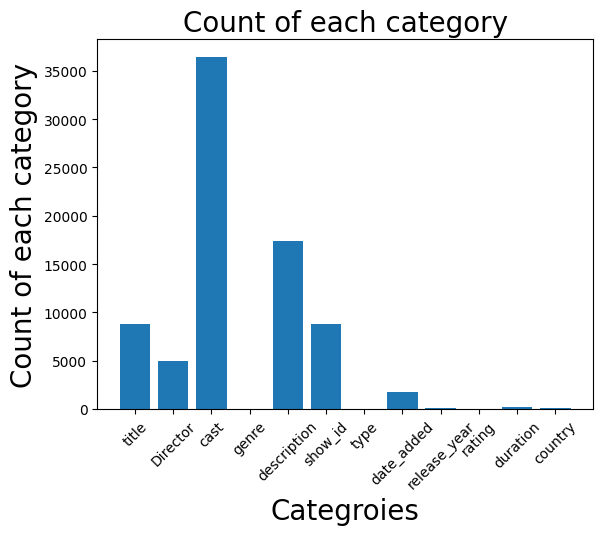

In [ ]:
plt.xlabel('Categroies',fontsize=20)
plt.ylabel('Count of each category',fontsize=20)
plt.title('Count of each category',fontsize=20)
plt.xticks(rotation=45,fontsize=10)
plt.bar(x,y)
plt.show()

# **2)Comparison of tv shows vs. movies.**
a. Find the number of movies produced in each country and pick the top 10
countries.

In [ ]:
movies_df = df_Finally_Done[df_Finally_Done['type'] == 'Movie']
movies_count_by_country = movies_df.groupby('country')['title'].nunique()
movies_count_by_country.reset_index(name='movie_count')
top_10_countries = movies_count_by_country.sort_values(ascending=False).head(10)
top_10_countries.reset_index()

,country,title
0,United States,2751
1,India,962
2,United Kingdom,532
3,Country not found,440
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114


**2)Comparison of tv shows vs. movies**.


b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.

In [ ]:
TV_Show_df = df_Finally_Done[df_Finally_Done['type'] == 'TV Show']
top_10_countries_TV_show = TV_Show_df.groupby('country')['title'].nunique()
top_10_countries_TV_show.reset_index(name='TV_Show_count')
top_10_countries_TV_show =top_10_countries_TV_show.sort_values(ascending=False)
top_10_countries_TV= top_10_countries_TV_show.reset_index()
top_10_countries_TV.head(10)

,country,title
0,United States,938
1,Country not found,391
2,United Kingdom,272
3,Japan,199
4,South Korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,66


In [ ]:
# Converting date_added feild to day, month, year
df_Finally_Done['date_added'].fillna(0, inplace=True)
df_Finally_Done['date_added'] = pd.to_datetime(df_Finally_Done['date_added'] ,format='mixed')
df_Finally_Done['year'] = df_Finally_Done['date_added'].dt.year
df_Finally_Done['month'] = df_Finally_Done['date_added'].dt.month
df_Finally_Done['day'] = df_Finally_Done['date_added'].dt.day
df_Finally_Done['week_of_month'] = (df_Finally_Done['day'] - 1) // 7 + 1 #Movies/ TV show relese on weeks of every month

**3. What is the best time to launch a TV show?**


a. Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies

Count of MOVIES Released on Every Week of the month

In [ ]:
movies_df = df_Finally_Done[df_Finally_Done['type'] == 'Movie']
movies_count_by_every_week= movies_df.groupby('week_of_month')['title'].nunique()
movies_count_by_every_week = movies_count_by_every_week.sort_values(ascending=False)
movies_count_by_every_week

week_of_month
1    2584
3    1393
4     931
2     821
5     402
Name: title, dtype: int64

**On the first week of every month maximum movies are released**

Count of movies release on every month

In [ ]:
movies_df = df_Finally_Done[df_Finally_Done['type'] == 'Movie']
movies_count_by_Month = movies_df.groupby('month')['title'].nunique()
movies_count_by_Month = movies_count_by_Month.sort_values(ascending=False)
movies_count_by_Month.head(10)

month
7     565
4     550
12    547
1     546
10    545
3     529
8     519
9     519
11    498
6     492
Name: title, dtype: int64

**On the month of july maximum movies are added on Netflix**

TV SHOW


Count of TV show released on every week of the month

In [ ]:
TV_show_df = df_Finally_Done[df_Finally_Done['type'] == 'TV Show']
TV_show_Released_ever_week  = TV_show_df.groupby('week_of_month')['title'].nunique()
TV_show_Released_ever_week = TV_show_Released_ever_week.sort_values(ascending=False)
TV_show_Released_ever_week.reset_index()

,week_of_month,title
0,1,924
1,3,655
2,2,444
3,4,430
4,5,223


**On thw first week of every month maximum TV shows are added in  netflix**

Count of TV show  release on every month

In [ ]:
TV_show_df = df_Finally_Done[df_Finally_Done['type'] == 'TV Show']
TV_show_Released_ever_week  = TV_show_df.groupby('month')['title'].nunique()
TV_show_Released_ever_week = TV_show_Released_ever_week.sort_values(ascending=False)
TV_show_Released_ever_week =TV_show_Released_ever_week.reset_index()
TV_show_Released_ever_week

,month,title
0,12,266
1,7,262
2,9,251
3,6,236
4,8,236
5,10,215
6,4,214
7,3,213
8,11,207
9,1,202


# **on the Month of December Maximum movies are added on netflix **



**4.Analysis of actors/directors of different types of shows/movies.**

a) Identify the top 10 Actors who have appeared in most movies or TV shows.

In [ ]:
df_Finally_Done
df_cast = df_Finally_Done.groupby('cast')['title'].nunique()
Top_10_Actors  = df_cast.sort_values(ascending=False)
Top_10_Actors.head(10)

cast
Unknown Actor       825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Name: title, dtype: int64

b)Identify the top 10 Directors who have appeared in most movies or TV shows.

In [ ]:
df_Finally_Done
df_Director = df_Finally_Done.groupby('Director')['title'].nunique()
Top_10_Director  = df_Director.sort_values(ascending=False)
Top_10_Director.head(10)

Director
Unknown Director       2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Marcus Raboy             16
Suhas Kadav              16
Jay Karas                15
Cathy Garcia-Molina      13
Jay Chapman              12
Martin Scorsese          12
Name: title, dtype: int64

**Q5.Which genre movies are more popular or produced more**


In [ ]:
movies_df = df_Finally_Done[df_Finally_Done['type'] == 'Movie']#Filtering All the movies from our dataset
unique_genre_counts =  movies_df .groupby('genre')['title'].nunique()
unique_genre_counts = unique_genre_counts.sort_values(ascending=False)
unique_genre_counts

genre
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Cult Movies                   71
Anime Features                71
Faith & Spirituality          65
Movies                        57
Name: title, dtype: int64

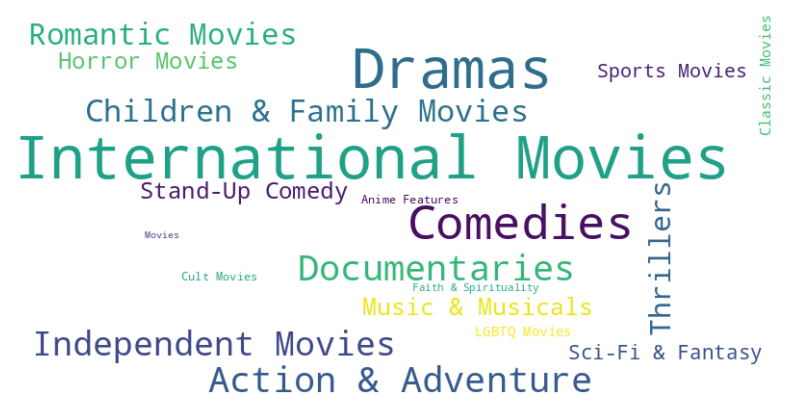

In [ ]:
#Creating word cloud for various Genre of movie
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(unique_genre_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the Above word cloud it found Movies Having Genre **International Movies** are more available in Netflix

**Q6)Find After how many days the movie will be added to Netflix after**
 **the release of
the movie**

In [ ]:
df_Finally_Done['release_year'] = pd.to_datetime(df_Finally_Done['release_year'], format='%Y')
df_Finally_Done ['days_added_on_Netflix'] = (df_Finally_Done ['date_added'] - df_Finally_Done['release_year']).dt.days
movies_df = df_Finally_Done[df_Finally_Done['type'] == 'Movie']
mode_days_to_add = movies_df['days_added_on_Netflix'].mode()[0]
movie_will_be_added_In = f"Minimum time for a movie  show to release in netflix is {mode_days_to_add} Days"
print(movie_will_be_added_In)

Minimum time for a movie  show to release in netflix is 196 Days


It can be infer from the above analysis movies are usually released on netflix after 196 from there release date